In [3]:
# 모델 학습하기 전  모델 분할(8:2) 및 범주형 데이터는 라벨 인코딩 필요
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# 데이터 준비
x = np.array([1,2,3,4,5]).reshape(-1, 1)
y = np.array([50, 55, 65, 70, 75])

In [5]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [15]:
# 기울기와 절편 확인
m = model.coef_[0]
b = model.intercept_
print('기울기 : ', m)
print('절편 :', b)

기울기 :  6.500000000000001
절편 : 43.5


In [16]:
y_prid = model.predict(x)

In [17]:
mse = mean_squared_error(y, y_prid)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_prid)
r2 = r2_score(y,y_prid)

In [19]:
print('MSE : ', mse)
print('RMSE : ', rmse)
print('MAE : ', mae)
print('R2 : ', r2)

MSE :  1.5
RMSE :  1.224744871391589
MAE :  1.0
R2 :  0.9825581395348837


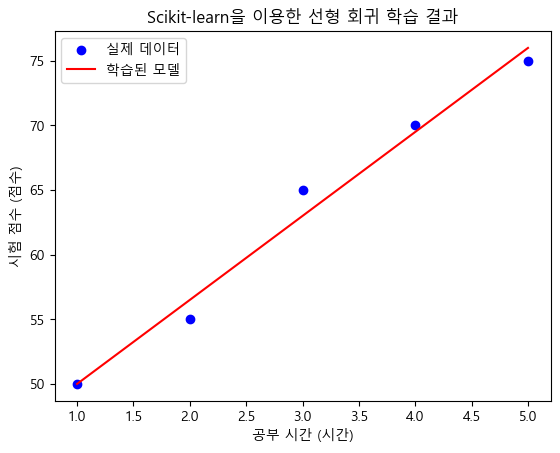

In [24]:
# 6. 학습 결과 시각화
plt.rc('font', family='Malgun Gothic') # For Windows
plt.scatter(x, y, color='blue', label='실제 데이터') # 실제 데이터
plt.plot(x, y_prid, color='red', label='학습된 모델') # 학습된 직선
plt.xlabel('공부 시간 (시간)')
plt.ylabel('시험 점수 (점수)')
plt.legend()
plt.title('Scikit-learn을 이용한 선형 회귀 학습 결과')
plt.show()

In [25]:
# 새로운 데이터 예측
new_hour = np.array([6, 8, 10, 12]).reshape(-1, 1)
predic_score = model.predict(new_hour)

In [26]:
print(predic_score)

[ 82.5  95.5 108.5 121.5]


*지도학습 - 분류 모델*

In [32]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import load_breast_cancer # 유방암 데이터셋 로드
from sklearn.model_selection import train_test_split # 학습용/테스트용 데이터 분리
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # 평가 지표
# 1. 데이터셋 로드 및 분리
data = load_breast_cancer() # 유방암 데이터셋 로드

x = data.data # 특징 데이터 (환자의 다양한 세포 정보)
y = data.target # 레이블 데이터 (0: 음성, 1: 양성)

In [33]:
#데이터 분류 : 학습 데이터와 테스트 데이터
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [35]:
y_pred = model.predict(x_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [37]:
print('accuracy : ', accuracy)
print('precision : ', precision)
print('recall : ', recall)
print('f1 : ', f1)

accuracy :  0.956140350877193
precision :  0.9459459459459459
recall :  0.9859154929577465
f1 :  0.9655172413793104


In [38]:
print(confusion_matrix(y_test, y_pred))

[[39  4]
 [ 1 70]]


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



*KNN*

In [45]:
# 1. 필요한 라이브러리 임포트
from sklearn.datasets import load_iris # Iris 데이터셋 로드
from sklearn.model_selection import train_test_split # 데이터 분리
from sklearn.neighbors import KNeighborsClassifier # KNN 알고리즘 사용
from sklearn.metrics import classification_report, accuracy_score #성능평가

In [47]:
iris = load_iris()
x = iris.data
y = iris.target

In [48]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [49]:
# 데이터 분리 : 학습 / 테스트
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [51]:
# KNN 모델 생성
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [52]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('정확도 : ', accuracy)

정확도 :  1.0


In [57]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [58]:
# 7. 새로운 데이터 예측
new_data=[[5.0, 3.5, 1.3, 0.3]] # 예측할 새로운 데이터 (꽃잎/꽃받침 크기)
prediction=knn.predict(new_data) # 예측
predicted_class=iris.target_names[prediction][0] # 예측된 품종 이름
print(f"\n새로운 데이터 {new_data}의 예측 결과: {predicted_class}")


새로운 데이터 [[5.0, 3.5, 1.3, 0.3]]의 예측 결과: setosa
